In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()


Saving train.csv to train.csv


# Dataset Description

In this project, I used the **Airline Passenger Satisfaction** dataset.  
The dataset contains a total of **103904 rows** and **25 columns**.

The columns include:

- Passenger demographics (Gender, Age, Customer Type)
- Flight details (Type of Travel, Class, Flight Distance)
- Service ratings (Inflight wifi service, Food and drink, Seat comfort, etc.)
- Delay information (Departure Delay in Minutes, Arrival Delay in Minutes)
- **Satisfaction level** (target variable)

I first loaded the dataset and displayed the first 5 rows with `df.head()`, which allowed me to see the general structure of the data.

Then, I checked the column types and non-null counts using `df.info()`.  
This confirmed that most columns have no missing values, and data types are appropriate.

Finally, I explored the unique values of the categorical columns (`object` dtype) to understand the categories present in the dataset:

- **Gender**: Female / Male
- **Customer Type**: Loyal Customer / disloyal Customer
- **Type of Travel**: Business travel / Personal travel
- **Class**: Business / Eco / Eco Plus
- **Satisfaction**: satisfied / neutral or dissatisfied

This initial exploration provided a good understanding of the data composition and prepared for further analysis.


In [3]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)



--- Gender ---
Gender
Female    52727
Male      51177
Name: count, dtype: int64
------------------------------

--- Customer Type ---
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
------------------------------

--- Type of Travel ---
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
------------------------------

--- Class ---
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
------------------------------

--- satisfaction ---
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
------------------------------


# Statistical Summary

I performed statistical summaries for both numerical and categorical variables.

For **numerical variables**, I used `df.describe()`, which showed:

- The average passenger **Age** is approximately **39.4 years**, ranging from **7 to 85**.
- **Flight Distance** has a wide range, with an average of about **1180 km**, and values going up to **4983 km**.
- **Departure Delay in Minutes** has an average of **14.8 minutes**, with many flights having **0 minutes delay**, but with some extreme outliers up to **1592 minutes**.
- **Service ratings** (such as Inflight wifi service, Food and drink, Seat comfort, etc.) mostly have an average around **3 to 4**, with values between **0 and 5** — indicating generally positive experiences.

For **categorical variables**, I used `df.describe(include='object')`, which revealed:

- **Gender** distribution is fairly balanced, with **Female: 52,727** and **Male: 51,177** passengers.
- The majority of the customers are **Loyal Customers** (84,923).
- The most common **Type of Travel** is **Business travel** (71,655 trips).
- **Class** distribution shows most passengers travel in **Business class** (49,665).
- The target variable **Satisfaction** indicates that most passengers are either **neutral or dissatisfied** (58,879), compared to **satisfied** (45,025).

**Conclusion**:  
This statistical summary provides valuable insights into the passenger demographics, flight characteristics, and satisfaction levels — helping guide further exploratory data analysis and model preparation.


In [7]:
df.describe()


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#  Missing Value Analysis

Missing values were checked for all columns.  
It was observed that most columns have no missing values.

One column, **Arrival Delay in Minutes**, had some missing values.  
Since the missing ratio was low, the missing values were kept


In [9]:
df.isnull().sum()


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


# Outlier Analysis

Outlier analysis was performed using boxplots for numeric variables.  

Outliers were detected in **Flight Distance**, **Departure Delay**, and **Arrival Delay** variables.

These extreme values are considered natural in the context of airline operations and were not removed from the dataset.


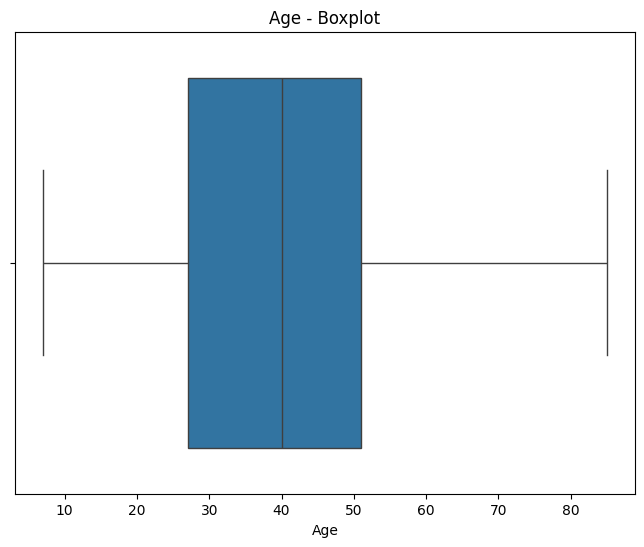

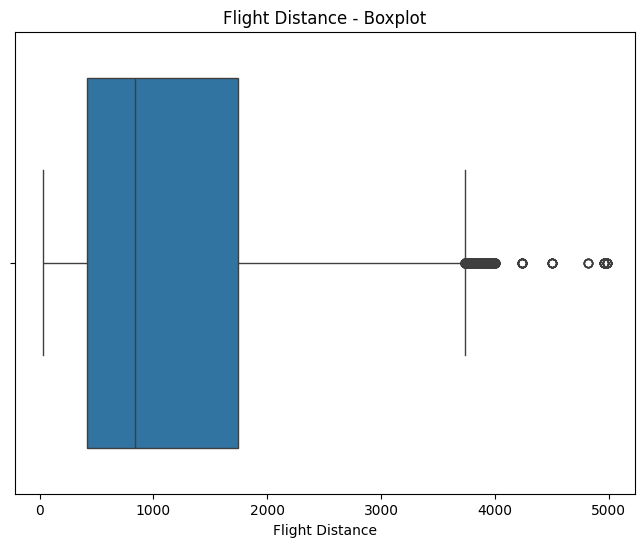

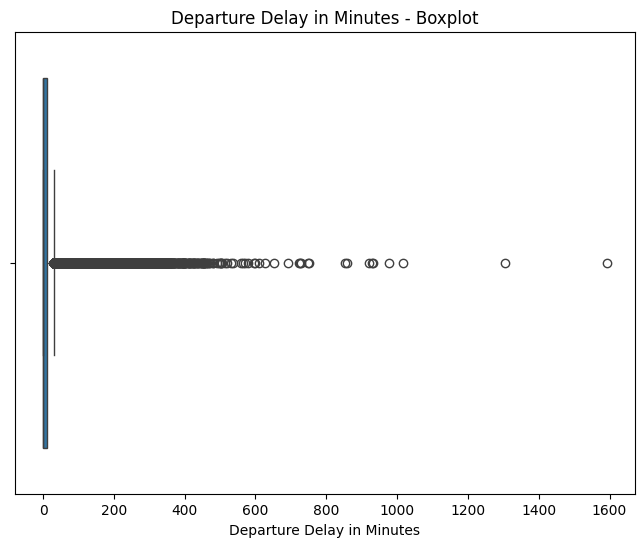

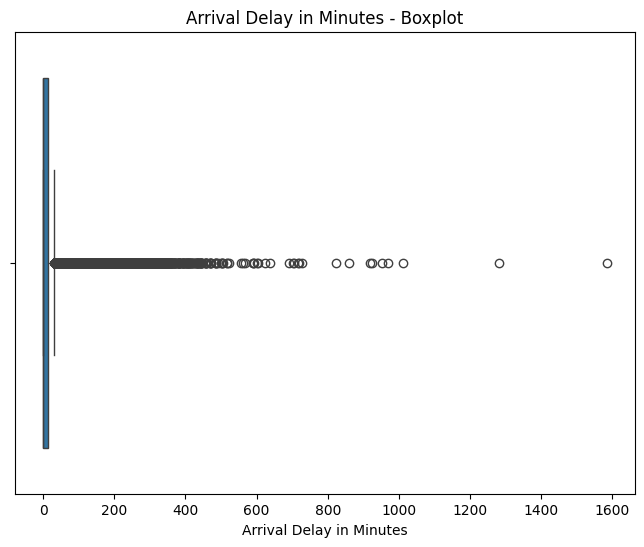

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Age"])
plt.title("Age - Boxplot")
plt.show()

# Flight Distance
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Flight Distance"])
plt.title("Flight Distance - Boxplot")
plt.show()

# Departure Delay in Minutes
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Departure Delay in Minutes"])
plt.title("Departure Delay in Minutes - Boxplot")
plt.show()

# Arrival Delay in Minutes
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Arrival Delay in Minutes"])
plt.title("Arrival Delay in Minutes - Boxplot")
plt.show()


#  Visualization

For **numeric variables**, histograms and boxplots were used to visualize the distributions.  
For **categorical variables**, bar charts were used to show the frequency of each category.

This provided a clear understanding of the data structure and patterns.


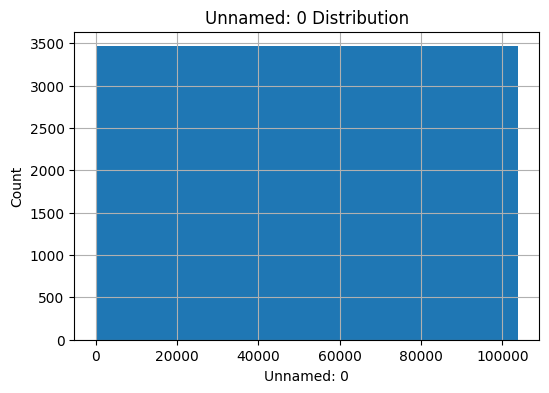

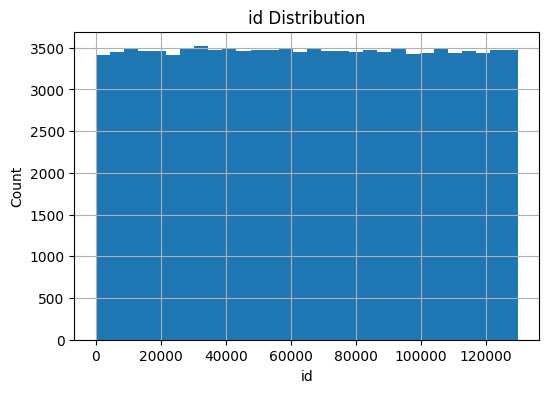

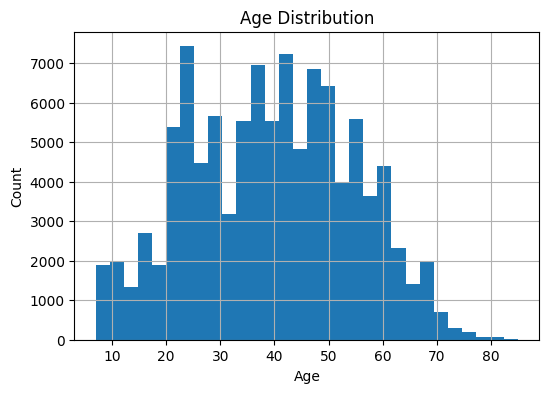

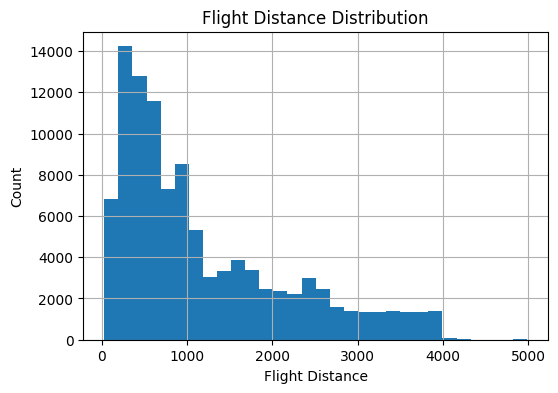

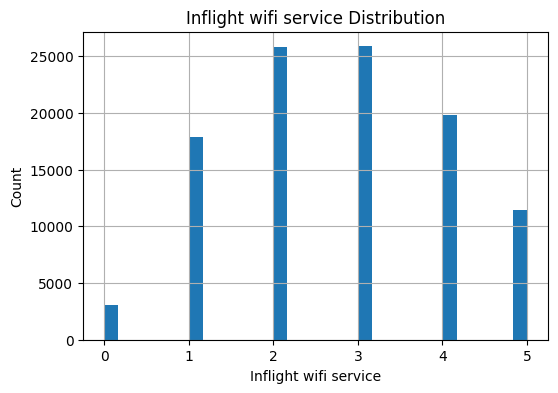

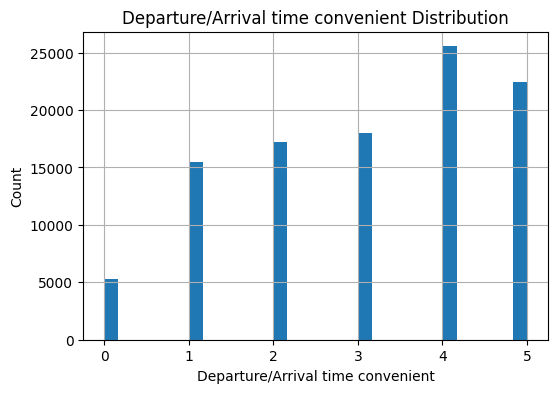

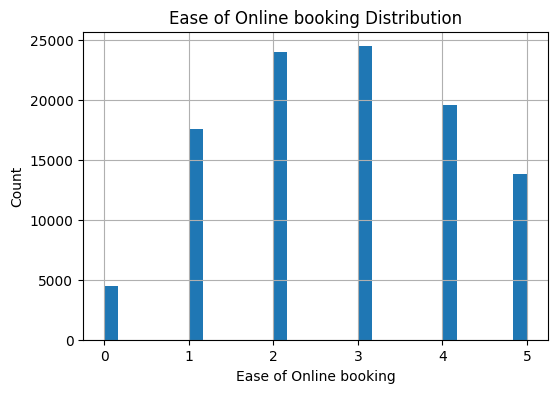

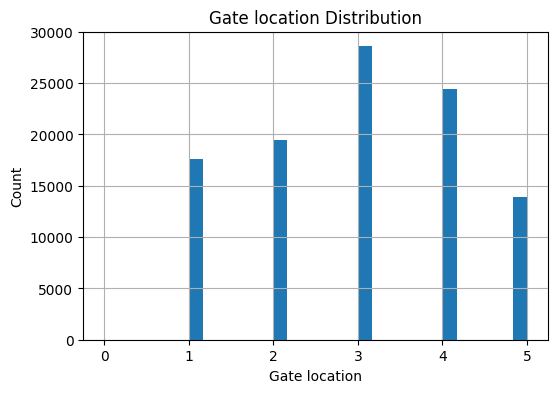

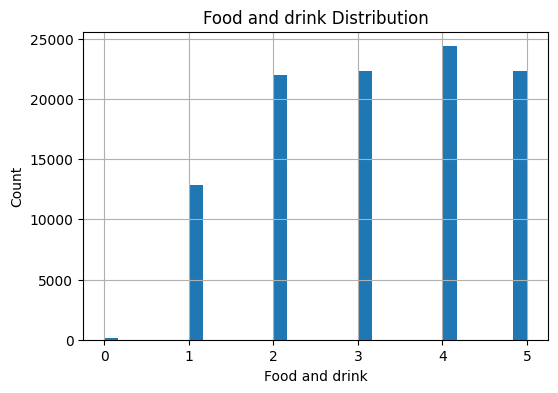

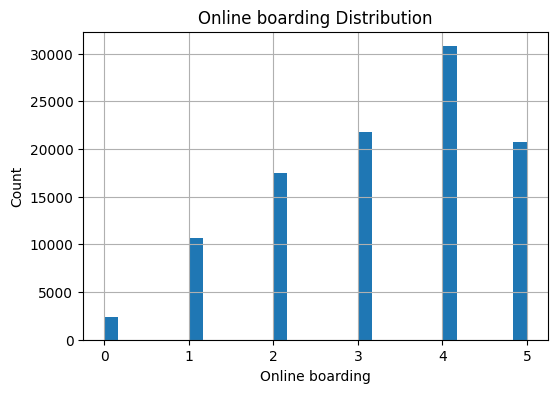

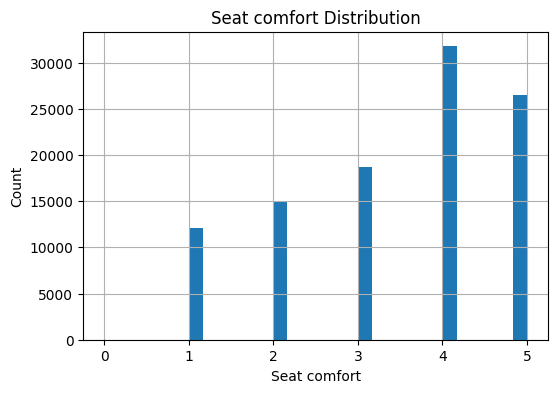

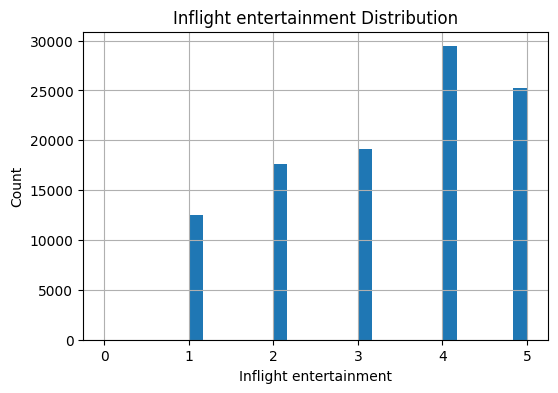

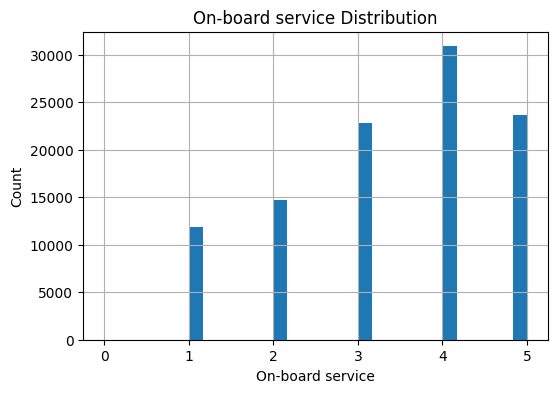

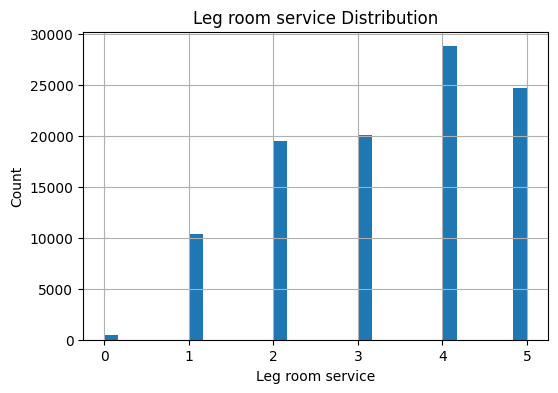

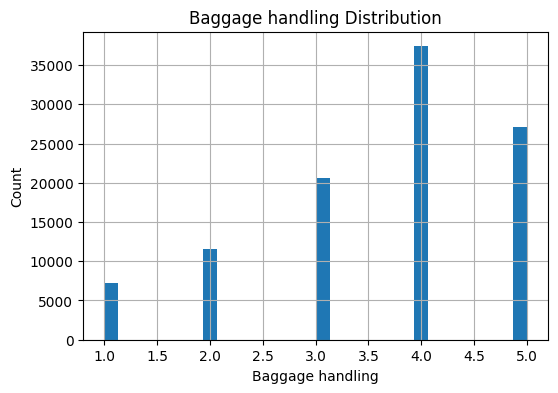

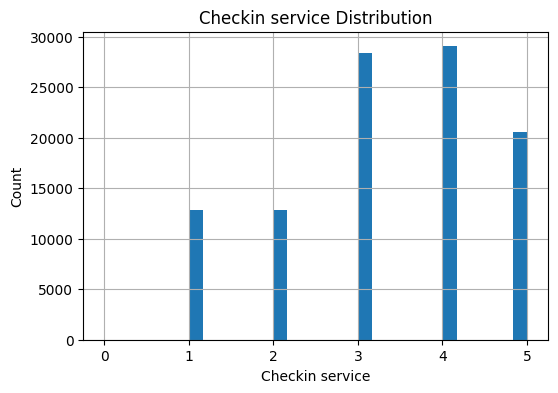

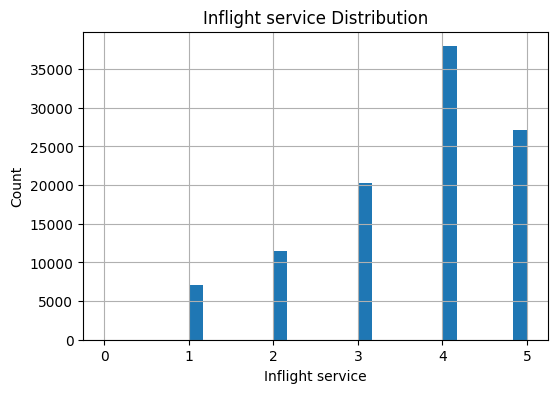

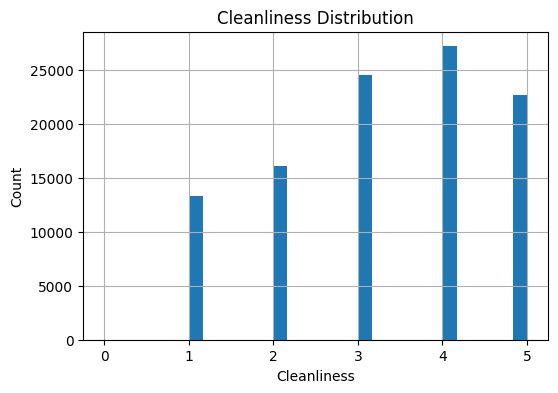

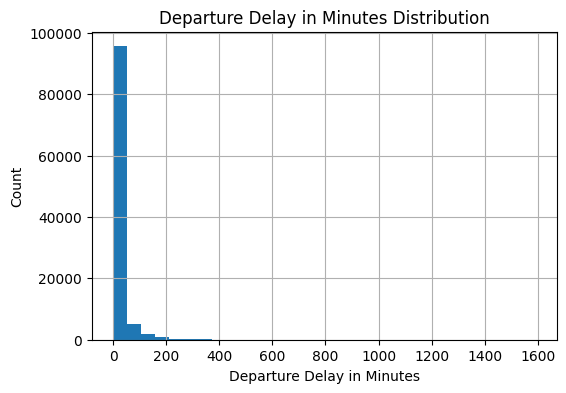

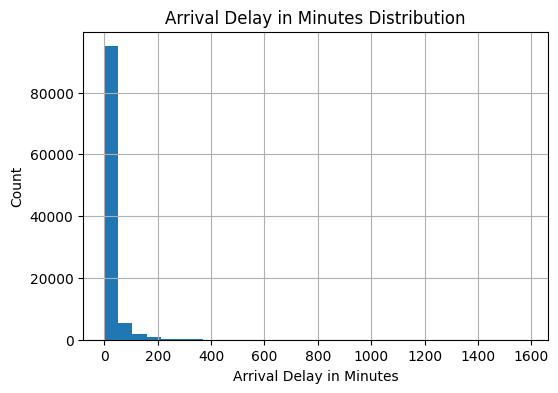

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"{col} Distribution")
    plt.show()


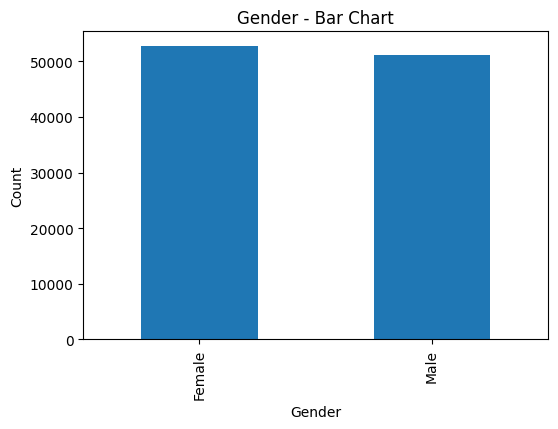

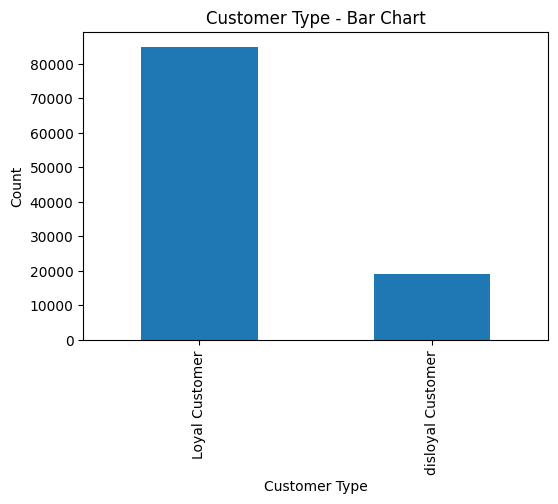

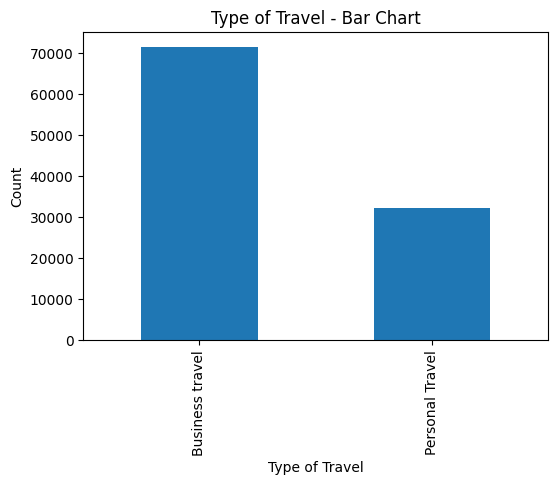

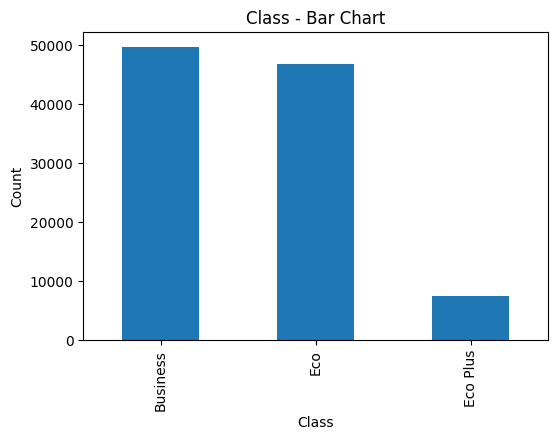

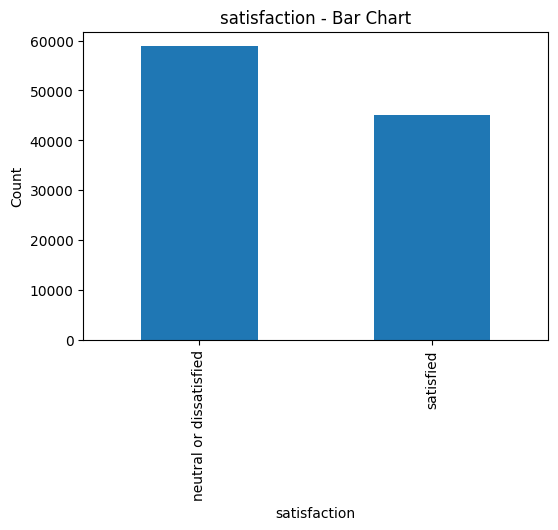

In [12]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} - Bar Chart")
    plt.ylabel("Count")
    plt.show()


## Correlation Analysis

To explore the relationships between the numerical variables, I created a correlation matrix using Pearson correlation coefficients.

- The matrix shows that **Flight Distance** is only weakly correlated with service ratings and other variables — which is expected, since flight length does not directly impact service quality.
- A strong positive correlation (0.97) was observed between **Departure Delay** and **Arrival Delay**, which makes sense because delays at departure naturally lead to delays at arrival.
- Medium to strong correlations were found among service quality ratings:
    - **Seat comfort** and **Leg room service** (0.69)
    - **Inflight wifi service** and **Inflight entertainment** (0.61)
    - **Food and drink** and **Inflight service** (0.66)
    - **Online boarding** and **Inflight entertainment** (0.61)

These relationships indicate that certain aspects of service quality tend to improve together, reflecting an overall good or bad service experience.

### Conclusion:
The correlation matrix helps in understanding which variables move together, which can guide feature selection and improve modeling in later stages.

---

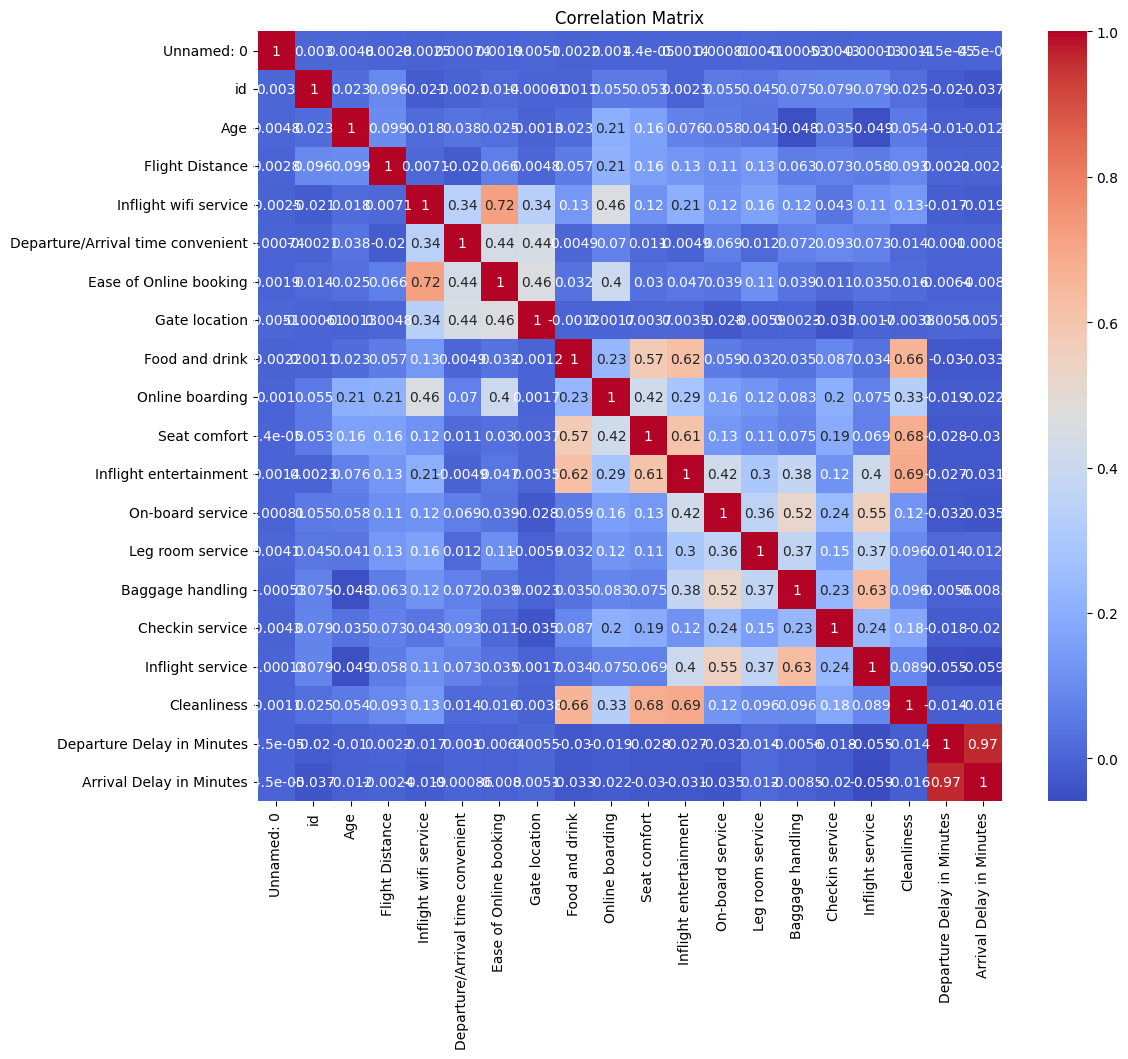

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
